In [1]:
!pip install arch

   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   ---------------------------------------- 10.2/924.9 kB ? eta -:--:--
   ---------------------------------------- 10.2/924.9 kB ? eta -:--:--
   ---------------------------------------- 10.2/924.9 kB ? eta -:--:--
   ---------------------------------------- 10.2/924.9 kB ? eta -:--:--
   --- ----------------------------------- 81.9/924.9 kB 353.1 kB/s eta 0:00:03
   --- ----------------------------------- 81.9/924.9 kB 353.1 kB/s eta 0:00:03
   --- ----------------------------------- 81.9/924.9 kB 353.1 kB/s eta 0:00:03
   --- ----------------------------------- 81.9/924.9 kB 353.1 kB/s eta 0:00:03
   -------- ----------------------------- 204.8/924.9 kB 478.0 kB/s eta 0:00:02
   -------- ----------------------------- 204.8/924.9 kB 478.0 kB/s eta 0:00:02
   -------- ----------------------------- 204.8/924.9 kB 478.0 kB/s eta 0:00:02
   -------- ----------------------------- 204.8/924.9 kB 478.0 kB/s eta 0:00:02
 

In [2]:
# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox
import seaborn as sns

In [3]:
# Set plotting style
sns.set(style="whitegrid")

In [4]:
# Step 1: Download Historical Data
ticker = "AMZN"
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [5]:
# Check data structure
print(data.head())
print(data.info())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-04-01  155.897003  158.121994  155.777496  158.050003  158.050003   
2021-04-05  158.649994  161.798004  158.061996  161.336502  161.336502   
2021-04-06  161.187500  162.365494  160.852005  161.190994  161.190994   
2021-04-07  161.690002  165.180496  161.182495  163.969498  163.969498   
2021-04-08  165.544998  166.225006  164.600006  164.964996  164.964996   

              Volume  
Date                  
2021-04-01  58806000  
2021-04-05  66698000  
2021-04-06  50756000  
2021-04-07  66924000  
2021-04-08  56242000  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2021-04-01 to 2024-03-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       753 non-null    float64
 1   High       753 non-null    float64
 2   Low        753 non-null    float

In [6]:
# Step 2: Calculate Returns
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna()  # Convert to percentage returns

In [7]:
# Step 3: Fit an ARCH Model
print("\nFitting ARCH Model...")
arch_model_fit = arch_model(returns, vol='ARCH', p=1).fit(disp='off')
print("ARCH Model Summary:")
print(arch_model_fit.summary())


Fitting ARCH Model...
ARCH Model Summary:
                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1680.83
Distribution:                  Normal   AIC:                           3367.67
Method:            Maximum Likelihood   BIC:                           3381.54
                                        No. Observations:                  752
Date:                Thu, Jul 25 2024   Df Residuals:                      751
Time:                        19:08:28   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0369  7.98

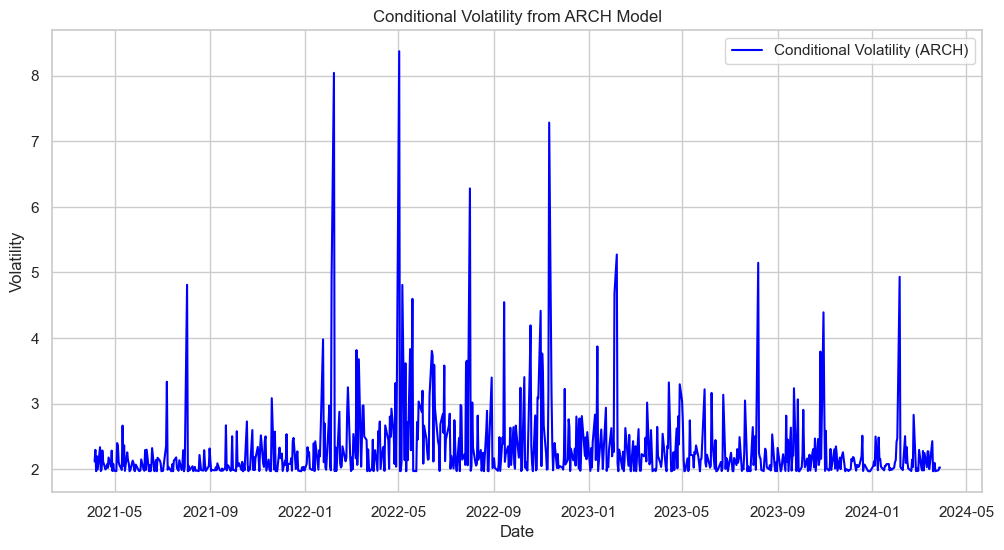

In [8]:
# Plot the conditional volatility from the ARCH model
plt.figure(figsize=(12, 6))
plt.plot(arch_model_fit.conditional_volatility, label='Conditional Volatility (ARCH)', color='blue')
plt.title('Conditional Volatility from ARCH Model')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Check residuals for autocorrelation
ljungbox_arch = acorr_ljungbox(arch_model_fit.resid, lags=[10])
print("\nLjung-Box Test for ARCH Model Residuals:")
print(ljungbox_arch)


Ljung-Box Test for ARCH Model Residuals:
     lb_stat  lb_pvalue
10  6.074631   0.808955


In [10]:
# Step 4: Fit a GARCH Model
print("\nFitting GARCH Model...")
garch_model_fit = arch_model(returns, vol='Garch', p=1, q=1).fit(disp='off')
print("GARCH Model Summary:")
print(garch_model_fit.summary())


Fitting GARCH Model...
GARCH Model Summary:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1658.75
Distribution:                  Normal   AIC:                           3325.51
Method:            Maximum Likelihood   BIC:                           3344.00
                                        No. Observations:                  752
Date:                Thu, Jul 25 2024   Df Residuals:                      751
Time:                        19:09:02   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0

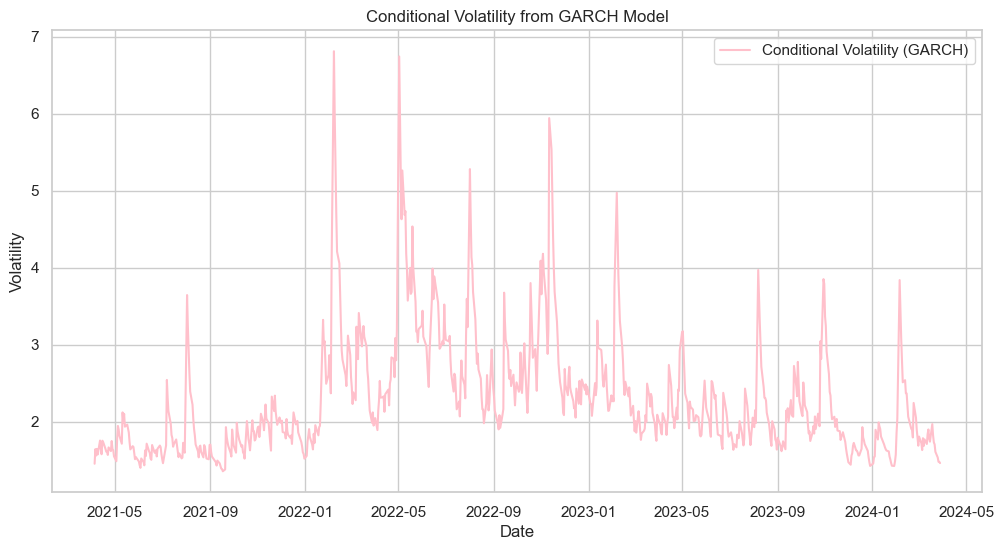

In [11]:
# Plot the conditional volatility from the GARCH model
plt.figure(figsize=(12, 6))
plt.plot(garch_model_fit.conditional_volatility, label='Conditional Volatility (GARCH)', color='pink')
plt.title('Conditional Volatility from GARCH Model')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Check residuals for autocorrelation
ljungbox_garch = acorr_ljungbox(garch_model_fit.resid, lags=[10])
print("\nLjung-Box Test for GARCH Model Residuals:")
print(ljungbox_garch)


Ljung-Box Test for GARCH Model Residuals:
     lb_stat  lb_pvalue
10  6.074631   0.808955


In [13]:
# Step 5: Fit GARCH Model with Additional Parameters
print("\nFitting GARCH Model with additional parameters...")
am = arch_model(returns, vol="Garch", p=1, q=1, dist="Normal")
res = am.fit(update_freq=5)


Fitting GARCH Model with additional parameters...
Iteration:      5,   Func. Count:     34,   Neg. LLF: 1666.5104854020747
Iteration:     10,   Func. Count:     62,   Neg. LLF: 1658.7534267877502
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1658.753425723704
            Iterations: 12
            Function evaluations: 71
            Gradient evaluations: 12


In [14]:
# Print forecast details
forecast_mean = res.forecast().mean
forecast_residual_variance = res.forecast().residual_variance
forecast_variance = res.forecast().variance

print("\nForecast Mean (last 3 periods):")
print(forecast_mean.iloc[-3:])
print("Forecast Residual Variance (last 3 periods):")
print(forecast_residual_variance.iloc[-3:])
print("Forecast Variance (last 3 periods):")
print(forecast_variance.iloc[-3:])


Forecast Mean (last 3 periods):
                 h.1
Date                
2024-03-28  0.111253
Forecast Residual Variance (last 3 periods):
                 h.1
Date                
2024-03-28  2.000285
Forecast Variance (last 3 periods):
                 h.1
Date                
2024-03-28  2.000285


In [15]:
# Forecasting with a horizon of 90 days
print("\nForecasting 90 days ahead...")
forecasts = res.forecast(horizon=90)


Forecasting 90 days ahead...


In [16]:
# Print forecast residual variance for the 90-day horizon
print("\n90-day Forecast Residual Variance (last 3 periods):")
print(forecasts.residual_variance.iloc[-3:])


90-day Forecast Residual Variance (last 3 periods):
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2024-03-28  2.000285  2.263874  2.514326  2.752297  2.978409  3.193253   

               h.07      h.08      h.09      h.10  ...      h.81      h.82  \
Date                                               ...                       
2024-03-28  3.39739  3.591354  3.775652  3.950766  ...  7.200975  7.205389   

                h.83      h.84      h.85      h.86      h.87     h.88  \
Date                                                                    
2024-03-28  7.209583  7.213569  7.217355  7.220953  7.224372  7.22762   

                h.89      h.90  
Date                            
2024-03-28  7.230707  7.233639  

[1 rows x 90 columns]


In [17]:
# Conclusion and Summary
print("\nAnalysis Summary:")
print("1. ARCH and GARCH models were successfully fitted to the returns data.")
print("2. Conditional volatility was plotted for both ARCH and GARCH models.")
print("3. Residuals were checked for autocorrelation using the Ljung-Box test.")
print("4. Forecasts were generated for a 90-day horizon, including variance and residual variance.")



Analysis Summary:
1. ARCH and GARCH models were successfully fitted to the returns data.
2. Conditional volatility was plotted for both ARCH and GARCH models.
3. Residuals were checked for autocorrelation using the Ljung-Box test.
4. Forecasts were generated for a 90-day horizon, including variance and residual variance.
